In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets, linear_model, metrics, tree
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score,f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.feature_selection import chi2, SelectKBest, f_regression
import xgboost as xgb

In [2]:
#Importing the datasets
df_Debt_redeemed = pd.read_csv('Debt_Redeemed_as_on_25.07.2024.csv')

df_entire_list_DI = pd.read_csv('list_of_Debt_Instruments_(including_Redeemed)_as_on_25.07.2024.csv')

In [3]:
#Making a copy

df_Debt_redeemed_copy1 = pd.read_csv('Debt_Redeemed_as_on_25.07.2024.csv')

df_entire_list_DI_copy1 = pd.read_csv('list_of_Debt_Instruments_(including_Redeemed)_as_on_25.07.2024.csv')

In [9]:
#Display first 5 rows of data
df_Debt_redeemed.head()

,COMPANY,ISIN,NAME_OF_THE_INSTRUMENT,DESCRIPTION_IN_NSDL,ISSUE_PRICE,FACE_VALUE,DATE_OF_ALLOTMENT,REDEMPTION,COUPON_RATE,FREQUENCY_OF_THE_INTEREST_PAYMENT,PUT_CALL_OPTION,CERTIFICATE_NOS,TOTAL_ISSUE_SIZE,REGISTRAR_WITH_BP_ID_NO,ADDRESS_WHERE_PHYSICAL_SECURITIES_IS_TO_BE_SENT,DEFAULTED_IN_REDEMPTION,NAME_OF_DEBENTURE,CREDIT_RATING_CREDIT_RATING_AGENCY,REMARKS
0,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LTD,INE871D08CS3,7.50% Unsecured Non-Convertible Debenture. Ser...,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LT...,1000.00,1000.0,30-Mar-02,30-Apr-20,7.50%,ON MATURITY,NaN,NaN,68540000.0,IN200094 LINK INTIME INDIA PRIVATE LIMITED,MR. V SRINIVAS RAO SENIOR MANAGER (CORPORATE S...,No,NaN,NaN,
1,SHRIRAM PROPERTIES LIMITED,INE217L07107,15.25% SECURED UNRATED UNLISTED REDEEMABLE NO...,SHRIRAM PROPERTIES LIMITED SR B 15.25 NCD 15J...,1000000.00,1000000.0,14-Jun-22,15-Jun-23,15.25,PAYABLE QAURTERLY,Put: Call:,NaN,300000000.0,IN200800 KFIN TECHNOLOGIES LIMITED,Mr. M R V Subrahmanyam General Manager KFIN TE...,No,NaN,NaN,
2,MUTHOOT FINANCE LIMITED,INE414G07DG0,10% SECURED RATED LISTED NON CONVERTIBLE DEBE...,MUTHOOT FINANCE LIMITED SR XIX OPT VI 10 NCD 2...,1091.87,1000.0,20-Mar-19,20-Mar-24,10%,ANNUALLY I.E FIRST INTEREST ON 20 MARCH 20 AND...,Put: N.A. Call: N.A.,NaN,917551000.0,IN200094 LINK INTIME INDIA PRIVATE LIMITED,MS. SHANTI GOPALAKRISHNAN ? LINK IN TIME INDIA...,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 30-01-2019,N.A. N.A.
3,WB IDFC TX,INE740F08173,11.85% Unsecured Government Guaranteed Taxable...,WB IDFC TX 11.85 BD 31OT12 FV RS 1 LAC LOA UPT...,100000.00,100000.0,01-Nov-02,31-Oct-12,11.85%,"Half Yearly, 31st March & 30th September",NaN,1 to 7164,NaN,IN200035 KFIN TECHNOLOGIES LIMITED,Mr. P.A. Varghese General Manager Karvy Comput...,No,NaN,NaN,NaN
4,POWER GRID CORPORATION OF INDIA LIMITED,INE752E07835,6.68% Secured Redeemable Non-Convertible Taxab...,POWER GRID CORPORATION OF INDIA LIMITED 15/L 6...,1250000.00,1250000.0,23-Feb-04,23-Feb-19,6.68%,"Annually, 23rd February",NaN,N.A.,NaN,IN200504 BEETAL FINAN.AND COMPU.,Mr. Subhabrata Biswas General Manager MCS Limi...,No,INDIANOVERSEASBANK,AAA ICRA LIMITED DT 02-06-2004,NaN


In [ ]:
#Display first 5 rows of data
df_entire_list_DI.head()

In [11]:
df_Debt_redeemed.shape 

(7678, 19)

In [13]:
df_entire_list_DI.shape

(23968, 19)

## Working with the entire list of Debt Instruments

In [14]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [16]:
#describe data
df_entire_list_DI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23968 entries, 0 to 23967
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   COMPANY                                          23965 non-null  object 
 1   ISIN                                             23968 non-null  object 
 2   NAME_OF_THE_INSTRUMENT                           23968 non-null  object 
 3   DESCRIPTION_IN_NSDL                              23968 non-null  object 
 4   ISSUE_PRICE                                      23968 non-null  float64
 5   FACE_VALUE                                       23968 non-null  float64
 6   DATE_OF_ALLOTMENT                                23968 non-null  object 
 7   REDEMPTION                                       23968 non-null  object 
 8   COUPON_RATE                                      22892 non-null  object 
 9   FREQUENCY_OF_THE_INTEREST_PA

In [17]:
df_entire_list_DI.columns

Index(['COMPANY', 'ISIN', 'NAME_OF_THE_INSTRUMENT', 'DESCRIPTION_IN_NSDL',
       'ISSUE_PRICE', 'FACE_VALUE', 'DATE_OF_ALLOTMENT', 'REDEMPTION',
       'COUPON_RATE', 'FREQUENCY_OF_THE_INTEREST_PAYMENT', 'PUT_CALL_OPTION',
       'CERTIFICATE_NOS', 'TOTAL_ISSUE_SIZE', 'REGISTRAR_WITH_BP_ID_NO',
       'ADDRESS_WHERE_PHYSICAL_SECURITIES_IS_TO_BE_SENT',
       'DEFAULTED_IN_REDEMPTION', 'NAME_OF_DEBENTURE',
       'CREDIT_RATING_CREDIT_RATING_AGENCY', 'REMARKS'],
      dtype='object')

In [20]:
# Columns to drop
columns_to_drop = ['CERTIFICATE_NOS', 'REGISTRAR_WITH_BP_ID_NO', 'ADDRESS_WHERE_PHYSICAL_SECURITIES_IS_TO_BE_SENT','REMARKS' ]
df_entire_list_DI.drop(columns=columns_to_drop, inplace=True)

In [26]:
df_entire_list_DI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23968 entries, 0 to 23967
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   COMPANY                             23965 non-null  object        
 1   ISIN                                23968 non-null  object        
 2   NAME_OF_THE_INSTRUMENT              23968 non-null  object        
 3   DESCRIPTION_IN_NSDL                 23968 non-null  object        
 4   ISSUE_PRICE                         23968 non-null  float64       
 5   FACE_VALUE                          23968 non-null  float64       
 6   DATE_OF_ALLOTMENT                   23968 non-null  datetime64[ns]
 7   REDEMPTION                          23968 non-null  datetime64[ns]
 8   COUPON_RATE                         22892 non-null  object        
 9   FREQUENCY_OF_THE_INTEREST_PAYMENT   22574 non-null  object        
 10  PUT_CALL_OPTION       

In [25]:
#Setting dates to datetime type to manipulation 
df_entire_list_DI['DATE_OF_ALLOTMENT'] = pd.to_datetime(df_entire_list_DI['DATE_OF_ALLOTMENT'])
df_entire_list_DI['REDEMPTION'] = pd.to_datetime(df_entire_list_DI['REDEMPTION'])

In [28]:
# Fill missing values or drop rows/columns as needed
df_entire_list_DI.dropna(subset=['CREDIT_RATING_CREDIT_RATING_AGENCY'], inplace=True)

In [29]:
df_entire_list_DI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14900 entries, 0 to 23964
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   COMPANY                             14900 non-null  object        
 1   ISIN                                14900 non-null  object        
 2   NAME_OF_THE_INSTRUMENT              14900 non-null  object        
 3   DESCRIPTION_IN_NSDL                 14900 non-null  object        
 4   ISSUE_PRICE                         14900 non-null  float64       
 5   FACE_VALUE                          14900 non-null  float64       
 6   DATE_OF_ALLOTMENT                   14900 non-null  datetime64[ns]
 7   REDEMPTION                          14900 non-null  datetime64[ns]
 8   COUPON_RATE                         14471 non-null  object        
 9   FREQUENCY_OF_THE_INTEREST_PAYMENT   14387 non-null  object        
 10  PUT_CALL_OPTION       

In [102]:
# Check if the instrument is Secured or Unsecured
def check_secured_unsecured(name):
    name = name.lower()  # Convert name to lowercase for case-insensitive comparison
    if 'unsecured' in name:
        return 'No'
    else:
        return 'Yes'

# Apply the function to create a new column
df_entire_list_DI['Secured'] = df_entire_list_DI['NAME_OF_THE_INSTRUMENT'].apply(check_secured_unsecured)

In [116]:
# Check if the instrument is Convertible or Non Convertible
def check_convertible(name):
    name = name.lower()  # Convert name to lowercase for case-insensitive comparison
    if 'non convertible' in name:
        return 'No'
    elif 'non-convertible' in name:
        return 'No'
    elif 'non covertable' in name:
        return 'No'
    else:
        return 'Yes'

# Apply the function to create a new column
df_entire_list_DI['Convertible'] = df_entire_list_DI['NAME_OF_THE_INSTRUMENT'].apply(check_convertible)

In [117]:
df_entire_list_DI

,COMPANY,ISIN,NAME_OF_THE_INSTRUMENT,DESCRIPTION_IN_NSDL,ISSUE_PRICE,FACE_VALUE,DATE_OF_ALLOTMENT,REDEMPTION,COUPON_RATE,FREQUENCY_OF_THE_INTEREST_PAYMENT,PUT_CALL_OPTION,TOTAL_ISSUE_SIZE,DEFAULTED_IN_REDEMPTION,NAME_OF_DEBENTURE,CREDIT_RATING_CREDIT_RATING_AGENCY,Rating and Agency,Credit Rating,Rating Score,Secured,Convertible
0,POWER GRID CORPORATION OF INDIA LIMITED,INE752E07GN7,8.90% Secured Non Convertible Non Cumulative ...,POWER GRID CORPORATION OF INDIA LIMITED 8.9 BD...,1250000.00,1250000.00,2010-02-25,2023-02-25,8.90%,Annually on 25th February,NaN,1706250000.00,No,IDBI TRUSTEESHIP SERVICES LIMITED,AAA CRISIL RATINGS LIMITED DT 07-06-2009,AAA CRISIL RATINGS,AAA,1.00,Yes,No
3,STAR UNION DAI-ICHI LIFE INSURANCE COMPANY LIM...,INE503V08016,7.75% UNSECURED RATED LISTED NON CONVERTIBLE S...,STAR UNION DAI-ICHI LIFE INSURANCE COMPANY LIM...,1000000.00,1000000.00,2021-11-24,2031-11-24,7.75%,"PAYABLE ON ANNUALLY BASIS ON 24/11/2022,24/11/...",Put: Call: THE ISSUER SHALL HAVE THE RIGHT TO...,1250000000.00,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 03-11-2021,AA ICRA LIMITED,AA,3.00,No,No
4,MUTHOOT FINANCE LIMITED,INE414G07DG0,10% SECURED RATED LISTED NON CONVERTIBLE DEBE...,MUTHOOT FINANCE LIMITED SR XIX OPT VI 10 NCD 2...,1091.87,1000.00,2019-03-20,2024-03-20,10%,ANNUALLY I.E FIRST INTEREST ON 20 MARCH 20 AND...,Put: N.A. Call: N.A.,917551000.00,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 30-01-2019,AA ICRA LIMITED,AA,3.00,Yes,No
5,NATIONAL HIGHWAYS AUTHORITY OF INDIA,INE906B07FI7,5.25% SECURED REDEEMABLE NON CONVERTIBLE NHAI ...,NATIONAL HIGHWAYS AUTHORITY OF INDIA SR XVIII ...,10000.00,10000.00,2017-05-31,2020-05-31,5.25%,ANNUAL ON 01 APR TILL MATURITY,Put: N.A. Call: N.A.,60000000000.00,No,SBICAP Trustee Company Limited,AAA ICRA LIMITED DT 31-03-2017,AAA ICRA LIMITED,AAA,1.00,Yes,No
10,RURAL ELECTRIFICATION CORPORATION LIMITED,INE020B07ML7,5% SECURED UNLISTED RATED REDEEMABLE NON CONVE...,RURAL ELECTRIFICATION CORPORATION LIMITED SR X...,10000.00,10000.00,2021-11-30,2026-11-30,5%,"PAYABLE ON ANNUALLY BASIS ON 30/06/2022,30/06/...",Put: Call:,4849040000.00,No,SBICAP Trustee Company Limited,AAA CRISIL RATINGS LIMITED DT 31-03-2021,AAA CRISIL RATINGS,AAA,1.00,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23954,RELIGARE FINVEST LIMITED,INE958G07569,12.25% Secured Non-Convertible Debenture. Opt-...,RELIGARE FINVEST LIMITED 12.25 NCD 23SP14 FVRS...,1050.00,1000.00,2011-09-23,2014-09-23,12.25%,Annually on 1st April and on maturity,NaN,NaN,No,Vistra ITCL (India) Limited,AA- ICRA LIMITED DT 12-08-2011,AA- ICRA LIMITED,AA-,4.00,Yes,No
23957,MAHINDRA AND MAHINDRA FINANCIAL SERVICES LIMITED,INE774D08MU4,8.53% UNSECURED LISTED REDEEMABLE NON CONVERTI...,MAHINDRA AND MAHINDRA FINANCIAL SERVICES LIMIT...,1000000.00,1000000.00,2018-04-19,2033-04-19,8.53%,"PAYABLE ON ANNUALLY BASOS ON 19/04/2019,19/04/...",Put: Call:,10000000000.00,No,Axis Trustee Services Limited,AAA INDIA RATING AND RESEARCH PVT. LTD DT 22-0...,AAA INDIA RATING,AAA,1.00,No,No
23960,L&T FINANCE LIMITED,INE691I07265,9% Secured Non-Convertible Long term Infrastru...,L&T FINANCE LIMITED SR-1 9 BD 10JN22 FVRS1000,1082.00,1000.00,2012-01-10,2022-01-10,9.00%,"Annually on 10/01/2013,10/01/2014,12/01/2015,1...",Put: Call:,1518482000.00,No,CATALYST TRUSTEESHIP LIMITED,AA+ CARE RATINGS LIMITED DT 04-11-2011,AA+ CARE RATINGS,AA+,2.00,Yes,No
23963,INDIABULLS HOUSING FINANCE LIMITED,INE148I07LN9,9% SECURED RATED LISTED NON CONVERTIBLE DEBENT...,INDIABULLS HOUSING FINANCE LIMITED SR IV CAT I...,965.25,1000.00,2022-04-28,2025-04-28,9%,"PAYABLE ON ANNUALLY BASIS ON 28/04/2023,29/04/...",Put: Call:,224857000.00,No,IDBI Trusteeship Services Limited,AA CRISIL RATINGS LIMITED DT 08-03-2022,AA CRISIL RATINGS,AA,3.00,Yes,No


In [132]:
df_entire_list_DI[df_entire_list_DI['ISIN'] == 'INE008A08U50']['NAME_OF_THE_INSTRUMENT'][312]

'8.99% UNSECURED OMNI BONDS 2012-13 TIER II SERIES III. DATE OF MATURITY 13/12/2027'

In [31]:
df_entire_list_DI['CREDIT_RATING_CREDIT_RATING_AGENCY'] != []

array(['AAA CRISIL RATINGS LIMITED DT 07-06-2009',
       'AA ICRA LIMITED DT 03-11-2021', 'AA ICRA LIMITED DT 30-01-2019',
       ..., 'AAA INDIA RATING AND RESEARCH PVT. LTD DT 14-01-2020',
       'AA- INDIA RATING AND RESEARCH PVT. LTD DT 25-11-2021',
       'AAA INDIA RATING AND RESEARCH PVT. LTD DT 22-03-2022'],
      dtype=object)

In [32]:
# Function to extract only the credit rating from the credit rating columns 
def extract_credit_rating(text):
    return text.split()[0]  # Split by space and take the first part

# Apply the function to the column
df_entire_list_DI['CREDIT_RATING'] = df_entire_list_DI['CREDIT_RATING_CREDIT_RATING_AGENCY'].apply(extract_credit_rating)


In [34]:
df_entire_list_DI['CREDIT_RATING'].unique()

array(['AAA', 'AA', 'AA+', 'BBB-', 'AA-', 'A', 'BB+', 'BB', 'BB-', 'C',
       'BBB', 'PP-MLD', 'A+', 'A-', 'AA(CE)', 'D', 'BB+(CE)', 'BBB+',
       'B+', 'BB-(SO)', 'AAA(CE)', 'BBB-(CE)', 'B', 'A+(CE)', 'A1', 'B-',
       'A-(CE)', 'AA-(CE)', 'A2', 'AA-r', 'C+', 'A(CE)', 'A1+(SO)',
       'PP-MLD?', 'A1+', 'AAAr', 'AA+r', 'A++', 'B(CE)', 'A1+r', 'C-',
       'BB-(CE)'], dtype=object)

In [35]:
# Function to extract only the credit rating from the credit rating columns 
def extract_credit_rating(text):
    return text.split()[1]  # Split by space and take the first part
df_entire_list_DI['CREDIT_RATING_AGENCY'] = df_entire_list_DI['CREDIT_RATING_CREDIT_RATING_AGENCY'].apply(extract_credit_rating)

In [37]:
df_entire_list_DI['CREDIT_RATING_AGENCY'].unique()

array(['CRISIL', 'ICRA', '(SO)', 'BRICKWORK', 'CARE', 'INDIA', 'Acuite',
       'Infomerics', 'AAAr', 'AA', 'AA-r', 'AA-', 'A+', 'A1+r', 'B+',
       'AAA', 'BBB', 'BB+', 'A+r', 'Ar', 'A', 'AA+r', 'AAr', 'BBB+',
       'A1+', 'r', 'A-', 'AA+', 'BBB-', 'BB', 'BB-'], dtype=object)

In [38]:
# Function to extract only the credit rating from the credit rating columns 
def extract_credit_rating(text):
    return text.split()[2]  # Split by space and take the first part
df_entire_list_DI['CREDIT_RATING_EXTRA'] = df_entire_list_DI['CREDIT_RATING_CREDIT_RATING_AGENCY'].apply(extract_credit_rating)

In [39]:
df_entire_list_DI['CREDIT_RATING_EXTRA'].unique()

array(['RATINGS', 'LIMITED', 'CARE', 'RATING', 'Ratings', 'Valuation',
       'INDIA', 'Acuite', 'CRISIL', 'BRICKWORK', 'ICRA', 'r',
       'Infomerics', '(CE)', '+', '(SO)'], dtype=object)

In [41]:
# Function to extract the first, second, and third parts of the string
def extract_rating_and_agency(text):
    parts = text.split()
    if len(parts) >= 3:
        return ' '.join(parts[:3])  
    else:
        return text  # If there are less than 3 parts, return the original text

# Apply the function to the column
df_entire_list_DI['Rating and Agency'] = df_entire_list_DI['CREDIT_RATING_CREDIT_RATING_AGENCY'].apply(extract_rating_and_agency)

In [44]:
df_entire_list_DI['Rating and Agency'].unique()

array(['AAA CRISIL RATINGS', 'AA ICRA LIMITED', 'AAA ICRA LIMITED',
       'AA+ CRISIL RATINGS', 'AAA (SO) CARE', 'AA BRICKWORK RATINGS',
       'AAA CARE RATINGS', 'BBB- BRICKWORK RATINGS', 'AA- CRISIL RATINGS',
       'AA+ CARE RATINGS', 'A ICRA LIMITED', 'AA+ INDIA RATING',
       'AA+ ICRA LIMITED', 'A CRISIL RATINGS', 'AA (SO) CARE',
       'BB+ BRICKWORK RATINGS', 'AA+ (SO) CARE', 'BB INDIA RATING',
       'BB+ CARE RATINGS', 'AA CRISIL RATINGS', 'BB+ Acuite Ratings',
       'AAA INDIA RATING', 'BB- Infomerics Valuation', 'AA CARE RATINGS',
       'AAA (SO) INDIA', 'BBB- ICRA LIMITED', 'AA- CARE RATINGS',
       'AA (SO) INDIA', 'AAA BRICKWORK RATINGS', 'AA (SO) Acuite',
       'AA INDIA RATING', 'C CRISIL RATINGS', 'AA Acuite Ratings',
       'BBB ICRA LIMITED', 'AA+ BRICKWORK RATINGS', 'PP-MLD AAAr CRISIL',
       'AA (SO) CRISIL', 'A+ (SO) INDIA', 'AAA (SO) CRISIL',
       'PP-MLD AA CARE', 'PP-MLD AA-r CRISIL', 'A- (SO) CARE',
       'AA+ (SO) BRICKWORK', 'A- (SO) ICRA', 'BB-

In [45]:
import re


In [48]:
# Function to extract the credit rating
def extract_credit_rating(text):
    # Check if the text starts with 'PP-MLD'
    if text.startswith('PP-MLD'):
        # Split the text and return the second word as the credit rating
        return text.split()[1]
    else:
        # Use regular expressions to match the credit rating pattern for other cases
        match = re.match(r'^[A-Z]+[\+\-]?[A-Z]?(?:\(CE\))?', text)
        if match:
            return match.group(0)  # Return the matched rating
        else:
            return None  # Return None if no match is found

# Apply the function to the column
df_entire_list_DI['Credit Rating'] = df_entire_list_DI['CREDIT_RATING_CREDIT_RATING_AGENCY'].apply(extract_credit_rating)

In [50]:
df_entire_list_DI['Credit Rating'].unique()

array(['AAA', 'AA', 'AA+', 'BBB-', 'AA-', 'A', 'BB+', 'BB', 'BB-', 'C',
       'BBB', 'AAAr', 'A+', 'AA-r', 'A-', 'AA(CE)', 'D', 'BB+(CE)',
       'BBB+', 'A1+r', 'B+', 'AAA(CE)', 'BBB-(CE)', 'B', 'A+(CE)', 'B-',
       'A-(CE)', 'AA-(CE)', 'A+r', 'Ar', 'AA+r', 'AAr', 'C+', 'A(CE)',
       'A1+', 'B(CE)', 'C-', 'BB-(CE)'], dtype=object)

In [51]:
df_entire_list_DI

,COMPANY,ISIN,NAME_OF_THE_INSTRUMENT,DESCRIPTION_IN_NSDL,ISSUE_PRICE,FACE_VALUE,DATE_OF_ALLOTMENT,REDEMPTION,COUPON_RATE,FREQUENCY_OF_THE_INTEREST_PAYMENT,PUT_CALL_OPTION,TOTAL_ISSUE_SIZE,DEFAULTED_IN_REDEMPTION,NAME_OF_DEBENTURE,CREDIT_RATING_CREDIT_RATING_AGENCY,CREDIT_RATING,CREDIT_RATING_AGENCY,CREDIT_RATING_EXTRA,Rating and Agency,Credit Rating
0,POWER GRID CORPORATION OF INDIA LIMITED,INE752E07GN7,8.90% Secured Non Convertible Non Cumulative ...,POWER GRID CORPORATION OF INDIA LIMITED 8.9 BD...,1250000.00,1250000.00,2010-02-25,2023-02-25,8.90%,Annually on 25th February,NaN,1706250000.00,No,IDBI TRUSTEESHIP SERVICES LIMITED,AAA CRISIL RATINGS LIMITED DT 07-06-2009,AAA,CRISIL,RATINGS,AAA CRISIL RATINGS,AAA
3,STAR UNION DAI-ICHI LIFE INSURANCE COMPANY LIM...,INE503V08016,7.75% UNSECURED RATED LISTED NON CONVERTIBLE S...,STAR UNION DAI-ICHI LIFE INSURANCE COMPANY LIM...,1000000.00,1000000.00,2021-11-24,2031-11-24,7.75%,"PAYABLE ON ANNUALLY BASIS ON 24/11/2022,24/11/...",Put: Call: THE ISSUER SHALL HAVE THE RIGHT TO...,1250000000.00,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 03-11-2021,AA,ICRA,LIMITED,AA ICRA LIMITED,AA
4,MUTHOOT FINANCE LIMITED,INE414G07DG0,10% SECURED RATED LISTED NON CONVERTIBLE DEBE...,MUTHOOT FINANCE LIMITED SR XIX OPT VI 10 NCD 2...,1091.87,1000.00,2019-03-20,2024-03-20,10%,ANNUALLY I.E FIRST INTEREST ON 20 MARCH 20 AND...,Put: N.A. Call: N.A.,917551000.00,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 30-01-2019,AA,ICRA,LIMITED,AA ICRA LIMITED,AA
5,NATIONAL HIGHWAYS AUTHORITY OF INDIA,INE906B07FI7,5.25% SECURED REDEEMABLE NON CONVERTIBLE NHAI ...,NATIONAL HIGHWAYS AUTHORITY OF INDIA SR XVIII ...,10000.00,10000.00,2017-05-31,2020-05-31,5.25%,ANNUAL ON 01 APR TILL MATURITY,Put: N.A. Call: N.A.,60000000000.00,No,SBICAP Trustee Company Limited,AAA ICRA LIMITED DT 31-03-2017,AAA,ICRA,LIMITED,AAA ICRA LIMITED,AAA
10,RURAL ELECTRIFICATION CORPORATION LIMITED,INE020B07ML7,5% SECURED UNLISTED RATED REDEEMABLE NON CONVE...,RURAL ELECTRIFICATION CORPORATION LIMITED SR X...,10000.00,10000.00,2021-11-30,2026-11-30,5%,"PAYABLE ON ANNUALLY BASIS ON 30/06/2022,30/06/...",Put: Call:,4849040000.00,No,SBICAP Trustee Company Limited,AAA CRISIL RATINGS LIMITED DT 31-03-2021,AAA,CRISIL,RATINGS,AAA CRISIL RATINGS,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23954,RELIGARE FINVEST LIMITED,INE958G07569,12.25% Secured Non-Convertible Debenture. Opt-...,RELIGARE FINVEST LIMITED 12.25 NCD 23SP14 FVRS...,1050.00,1000.00,2011-09-23,2014-09-23,12.25%,Annually on 1st April and on maturity,NaN,NaN,No,Vistra ITCL (India) Limited,AA- ICRA LIMITED DT 12-08-2011,AA-,ICRA,LIMITED,AA- ICRA LIMITED,AA-
23957,MAHINDRA AND MAHINDRA FINANCIAL SERVICES LIMITED,INE774D08MU4,8.53% UNSECURED LISTED REDEEMABLE NON CONVERTI...,MAHINDRA AND MAHINDRA FINANCIAL SERVICES LIMIT...,1000000.00,1000000.00,2018-04-19,2033-04-19,8.53%,"PAYABLE ON ANNUALLY BASOS ON 19/04/2019,19/04/...",Put: Call:,10000000000.00,No,Axis Trustee Services Limited,AAA INDIA RATING AND RESEARCH PVT. LTD DT 22-0...,AAA,INDIA,RATING,AAA INDIA RATING,AAA
23960,L&T FINANCE LIMITED,INE691I07265,9% Secured Non-Convertible Long term Infrastru...,L&T FINANCE LIMITED SR-1 9 BD 10JN22 FVRS1000,1082.00,1000.00,2012-01-10,2022-01-10,9.00%,"Annually on 10/01/2013,10/01/2014,12/01/2015,1...",Put: Call:,1518482000.00,No,CATALYST TRUSTEESHIP LIMITED,AA+ CARE RATINGS LIMITED DT 04-11-2011,AA+,CARE,RATINGS,AA+ CARE RATINGS,AA+
23963,INDIABULLS HOUSING FINANCE LIMITED,INE148I07LN9,9% SECURED RATED LISTED NON CONVERTIBLE DEBENT...,INDIABULLS HOUSING FINANCE LIMITED SR IV CAT I...,965.25,1000.00,2022-04-28,2025-04-28,9%,"PAYABLE ON ANNUALLY BASIS ON 28/04/2023,29/04/...",Put: Call:,224857000.00,No,IDBI Trusteeship Services Limited,AA CRISIL RATINGS LIMITED DT 08-03-2022,AA,CRISIL,RATINGS,AA CRISIL RATINGS,AA


In [64]:
# A dictionary to map ratings to scores
rating_to_score = {
    'AAA': 1, 'AAAr': 1, 'AAA(CE)': 1,
    'AA+': 2, 'AA+r': 2,
    'AA': 3, 'AAr': 3, 'AA(CE)': 3,
    'AA-': 4, 'AA-r': 4, 'AA-(CE)': 4,
    'A+': 5, 'A+r': 5, 'A+(CE)': 5,
    'A': 6, 'Ar': 6, 'A(CE)': 6,
    'A-': 7, 'A-(CE)': 7,
    'BBB+': 8, 'BBB-(CE)': 8,
    'BBB': 9,
    'BBB-': 10,
    'BB+': 11, 'BB+(CE)': 11,
    'BB': 12, 'BB-(CE)': 12,
    'BB-': 13,
    'B+': 14, 'B(CE)': 14,
    'B': 15,
    'B-': 16,
    'C+': 17, 'C': 17,
    'C-': 18,
    'D': 19
}

# Map the 'Credit Rating' column to the rating scores to get values to compute on 
df_entire_list_DI['Rating Score'] = df_entire_list_DI['Credit Rating'].map(rating_to_score)

In [136]:
df_entire_list_DI

,COMPANY,ISIN,NAME_OF_THE_INSTRUMENT,DESCRIPTION_IN_NSDL,ISSUE_PRICE,FACE_VALUE,DATE_OF_ALLOTMENT,REDEMPTION,COUPON_RATE,FREQUENCY_OF_THE_INTEREST_PAYMENT,PUT_CALL_OPTION,TOTAL_ISSUE_SIZE,DEFAULTED_IN_REDEMPTION,NAME_OF_DEBENTURE,CREDIT_RATING_CREDIT_RATING_AGENCY,Rating and Agency,Credit Rating,Rating Score,Secured,Convertible
0,POWER GRID CORPORATION OF INDIA LIMITED,INE752E07GN7,8.90% Secured Non Convertible Non Cumulative ...,POWER GRID CORPORATION OF INDIA LIMITED 8.9 BD...,1250000.00,1250000.00,2010-02-25,2023-02-25,8.90%,Annually on 25th February,NaN,1706250000.00,No,IDBI TRUSTEESHIP SERVICES LIMITED,AAA CRISIL RATINGS LIMITED DT 07-06-2009,AAA CRISIL RATINGS,AAA,1.00,Yes,No
3,STAR UNION DAI-ICHI LIFE INSURANCE COMPANY LIM...,INE503V08016,7.75% UNSECURED RATED LISTED NON CONVERTIBLE S...,STAR UNION DAI-ICHI LIFE INSURANCE COMPANY LIM...,1000000.00,1000000.00,2021-11-24,2031-11-24,7.75%,"PAYABLE ON ANNUALLY BASIS ON 24/11/2022,24/11/...",Put: Call: THE ISSUER SHALL HAVE THE RIGHT TO...,1250000000.00,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 03-11-2021,AA ICRA LIMITED,AA,3.00,No,No
4,MUTHOOT FINANCE LIMITED,INE414G07DG0,10% SECURED RATED LISTED NON CONVERTIBLE DEBE...,MUTHOOT FINANCE LIMITED SR XIX OPT VI 10 NCD 2...,1091.87,1000.00,2019-03-20,2024-03-20,10%,ANNUALLY I.E FIRST INTEREST ON 20 MARCH 20 AND...,Put: N.A. Call: N.A.,917551000.00,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 30-01-2019,AA ICRA LIMITED,AA,3.00,Yes,No
5,NATIONAL HIGHWAYS AUTHORITY OF INDIA,INE906B07FI7,5.25% SECURED REDEEMABLE NON CONVERTIBLE NHAI ...,NATIONAL HIGHWAYS AUTHORITY OF INDIA SR XVIII ...,10000.00,10000.00,2017-05-31,2020-05-31,5.25%,ANNUAL ON 01 APR TILL MATURITY,Put: N.A. Call: N.A.,60000000000.00,No,SBICAP Trustee Company Limited,AAA ICRA LIMITED DT 31-03-2017,AAA ICRA LIMITED,AAA,1.00,Yes,No
10,RURAL ELECTRIFICATION CORPORATION LIMITED,INE020B07ML7,5% SECURED UNLISTED RATED REDEEMABLE NON CONVE...,RURAL ELECTRIFICATION CORPORATION LIMITED SR X...,10000.00,10000.00,2021-11-30,2026-11-30,5%,"PAYABLE ON ANNUALLY BASIS ON 30/06/2022,30/06/...",Put: Call:,4849040000.00,No,SBICAP Trustee Company Limited,AAA CRISIL RATINGS LIMITED DT 31-03-2021,AAA CRISIL RATINGS,AAA,1.00,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23954,RELIGARE FINVEST LIMITED,INE958G07569,12.25% Secured Non-Convertible Debenture. Opt-...,RELIGARE FINVEST LIMITED 12.25 NCD 23SP14 FVRS...,1050.00,1000.00,2011-09-23,2014-09-23,12.25%,Annually on 1st April and on maturity,NaN,NaN,No,Vistra ITCL (India) Limited,AA- ICRA LIMITED DT 12-08-2011,AA- ICRA LIMITED,AA-,4.00,Yes,No
23957,MAHINDRA AND MAHINDRA FINANCIAL SERVICES LIMITED,INE774D08MU4,8.53% UNSECURED LISTED REDEEMABLE NON CONVERTI...,MAHINDRA AND MAHINDRA FINANCIAL SERVICES LIMIT...,1000000.00,1000000.00,2018-04-19,2033-04-19,8.53%,"PAYABLE ON ANNUALLY BASOS ON 19/04/2019,19/04/...",Put: Call:,10000000000.00,No,Axis Trustee Services Limited,AAA INDIA RATING AND RESEARCH PVT. LTD DT 22-0...,AAA INDIA RATING,AAA,1.00,No,No
23960,L&T FINANCE LIMITED,INE691I07265,9% Secured Non-Convertible Long term Infrastru...,L&T FINANCE LIMITED SR-1 9 BD 10JN22 FVRS1000,1082.00,1000.00,2012-01-10,2022-01-10,9.00%,"Annually on 10/01/2013,10/01/2014,12/01/2015,1...",Put: Call:,1518482000.00,No,CATALYST TRUSTEESHIP LIMITED,AA+ CARE RATINGS LIMITED DT 04-11-2011,AA+ CARE RATINGS,AA+,2.00,Yes,No
23963,INDIABULLS HOUSING FINANCE LIMITED,INE148I07LN9,9% SECURED RATED LISTED NON CONVERTIBLE DEBENT...,INDIABULLS HOUSING FINANCE LIMITED SR IV CAT I...,965.25,1000.00,2022-04-28,2025-04-28,9%,"PAYABLE ON ANNUALLY BASIS ON 28/04/2023,29/04/...",Put: Call:,224857000.00,No,IDBI Trusteeship Services Limited,AA CRISIL RATINGS LIMITED DT 08-03-2022,AA CRISIL RATINGS,AA,3.00,Yes,No


## Now that we have a rating score, we can move on with the analysis of the ratings with the issue value and face value

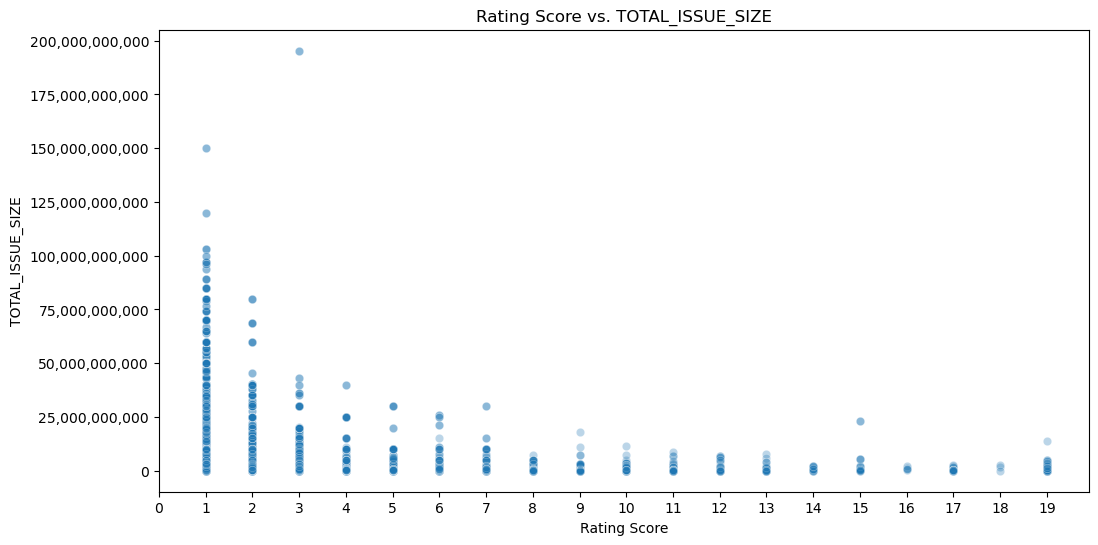

In [144]:
# Scatter plot for Rating Score vs Issue Value
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating Score', y='TOTAL_ISSUE_SIZE', data=df_entire_list_DI, alpha=0.3)
plt.title('Rating Score vs. TOTAL_ISSUE_SIZE')

def format_large_ticks(x, pos):
    """Format numbers with commas."""
    return '{:,}'.format(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_large_ticks))


plt.xticks(ticks=range(0, 20, 1))


plt.show()

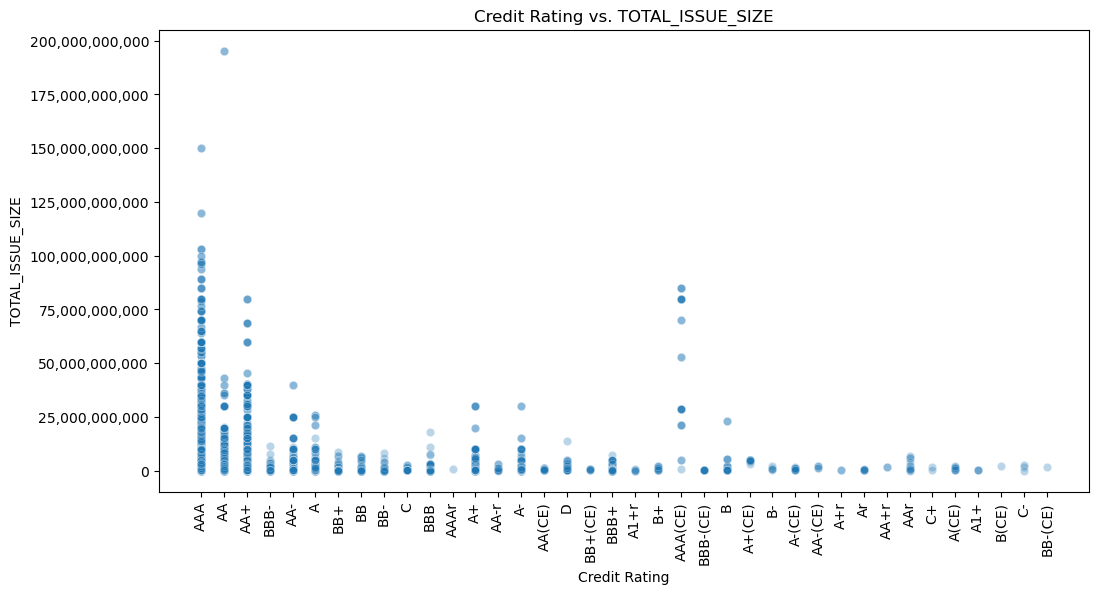

In [148]:
# Scatter plot for Rating Score vs Issue Value
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Credit Rating', y='TOTAL_ISSUE_SIZE', data=df_entire_list_DI, alpha=0.3)
plt.title('Credit Rating vs. TOTAL_ISSUE_SIZE')

def format_large_ticks(x, pos):
    """Format numbers with commas."""
    return '{:,}'.format(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_large_ticks))

plt.xticks(rotation=90 )

plt.show()

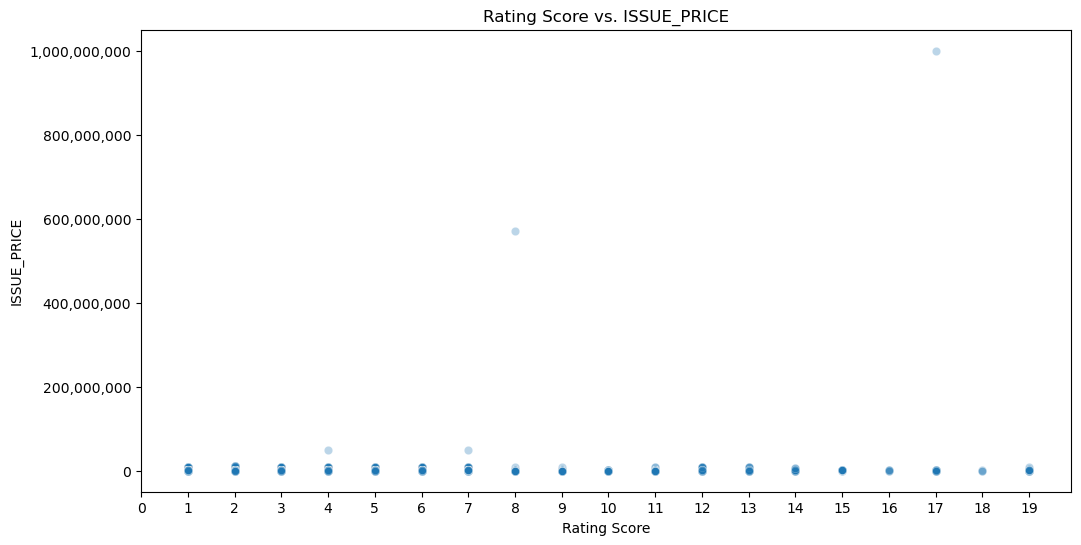

In [151]:
# Scatter plot for Rating Score vs Issue Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating Score', y='ISSUE_PRICE', data=df_entire_list_DI, alpha=0.3)
plt.title('Rating Score vs. ISSUE_PRICE')

def format_large_ticks(x, pos):
    """Format numbers with commas."""
    return '{:,}'.format(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_large_ticks))


plt.xticks(ticks=range(0, 20, 1))


plt.show()

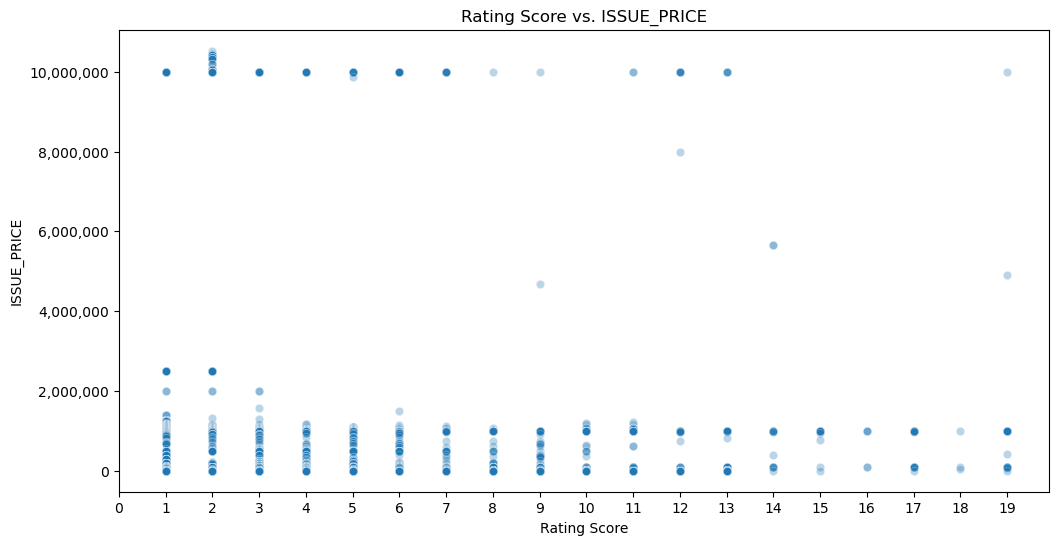

In [154]:
# Removing top 5 highest entries in ISSUE_PRICE
df_sorted = df_entire_list_DI.sort_values(by='ISSUE_PRICE', ascending=False)

# Remove the top 5 highest entries
df_filtered = df_sorted.iloc[5:]

# Optionally, reset the index
df_filtered = df_filtered.reset_index(drop=True)

# Scatter plot for Rating Score vs Issue Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating Score', y='ISSUE_PRICE', data=df_filtered, alpha=0.3)
plt.title('Rating Score vs. ISSUE_PRICE')

def format_large_ticks(x, pos):
    """Format numbers with commas."""
    return '{:,}'.format(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_large_ticks))

plt.ylabel('ISSUE_PRICE')

plt.xticks(ticks=range(0, 20, 1))


plt.show()

In [163]:
#Correlation analysis:
correlation_issue_value = df_entire_list_DI['Rating Score'].corr(df_entire_list_DI['TOTAL_ISSUE_SIZE'])
print(f"Correlation between Rating Score and TOTAL_ISSUE_SIZE: {correlation_issue_value}")

Correlation between Rating Score and TOTAL_ISSUE_SIZE: -0.22720619336855483


In [164]:
correlation_issue_value = df_entire_list_DI['Rating Score'].corr(df_entire_list_DI['ISSUE_PRICE'])
print(f"Correlation between Rating Score and ISSUE_PRICE: {correlation_issue_value}")

Correlation between Rating Score and ISSUE_PRICE: 0.0393589991511649


In [165]:
correlation_matrix = df_entire_list_DI[['Rating Score', 'TOTAL_ISSUE_SIZE', 'ISSUE_PRICE']].corr()
print(correlation_matrix)

                  Rating Score  TOTAL_ISSUE_SIZE  ISSUE_PRICE
Rating Score              1.00             -0.23         0.04
TOTAL_ISSUE_SIZE         -0.23              1.00         0.01
ISSUE_PRICE               0.04              0.01         1.00


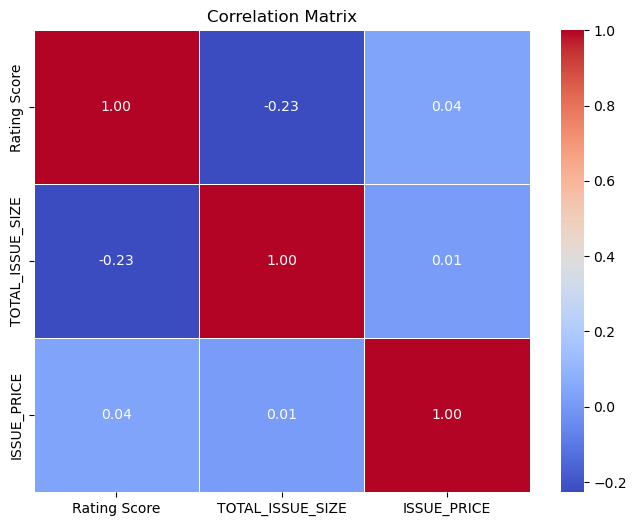

In [166]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

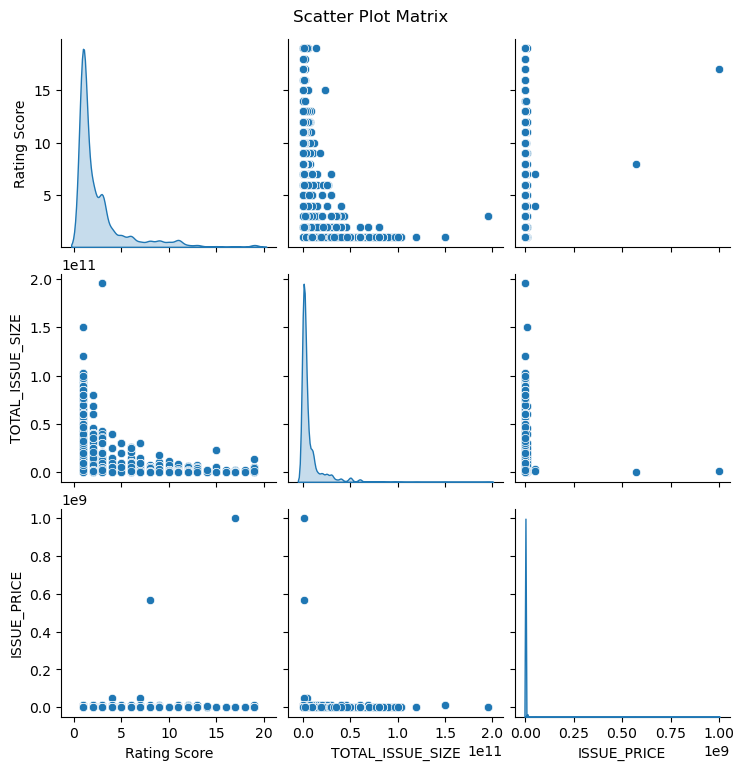

In [168]:
# Plot scatter plot matrix
sns.pairplot(df_entire_list_DI[['Rating Score', 'TOTAL_ISSUE_SIZE', 'ISSUE_PRICE']], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix', y=1.02)



plt.show()

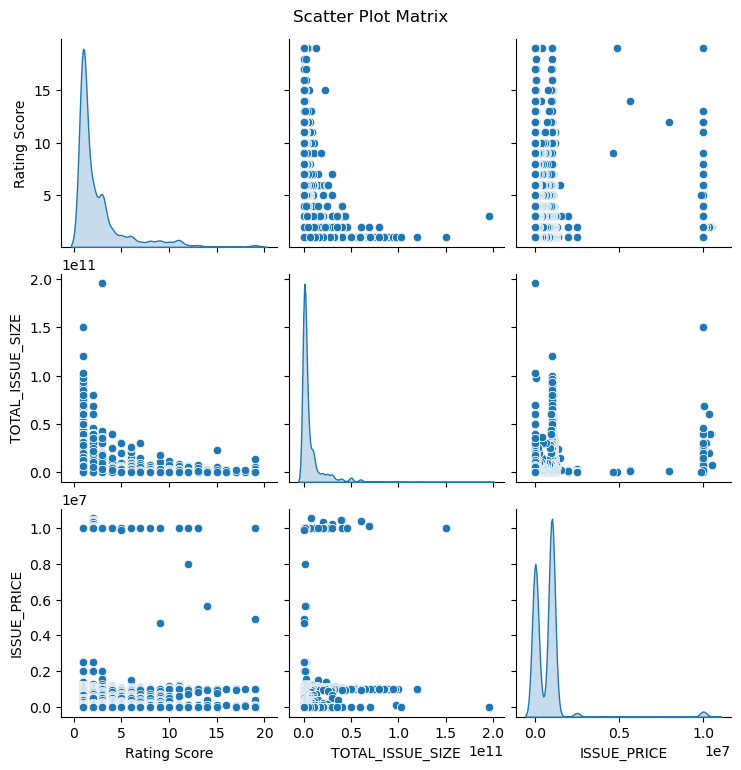

In [171]:
# Plot scatter plot matrix
sns.pairplot(df_filtered[['Rating Score', 'TOTAL_ISSUE_SIZE', 'ISSUE_PRICE']], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix', y=1.02)

def format_large_ticks(x, pos):
    """Format numbers with commas."""
    return '{:,}'.format(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_large_ticks))

plt.show()

In [172]:
#Grouped Statistics
grouped_stats = df_entire_list_DI.groupby('Rating Score').agg({
    'ISSUE_PRICE': ['mean', 'median', 'std', 'count'],
})

print(grouped_stats)

             ISSUE_PRICE                              
                    mean     median          std count
Rating Score                                          
1.00           698113.43 1000000.00    866514.77  7985
2.00          1046985.92 1000000.00   1765269.55  2115
3.00           774508.29  555223.00   1619329.22  1972
4.00           753126.99  500000.00   2327320.82   620
5.00           775529.83  840000.00   1509735.49   422
6.00           773361.36  500000.00   1663386.75   411
7.00          1389002.99 1000000.00   4127852.18   181
8.00          2876985.79    5000.00  37984937.75   225
9.00           285274.09    1185.00    794233.97   239
10.00          371289.17   25000.00    470233.34   176
11.00          228259.23    1000.00    919638.28   268
12.00         1437281.02  100000.00   3020196.33    62
13.00          899917.23  100000.00   2300290.31    70
14.00         1197589.41  983635.14   1791230.72    16
15.00          918720.37 1000000.00    254774.36    27
16.00     

In [173]:
#Grouped Statistics
grouped_stats = df_entire_list_DI.groupby('Rating Score').agg({
    'TOTAL_ISSUE_SIZE': ['mean', 'median', 'std', 'count'],
})

print(grouped_stats)

             TOTAL_ISSUE_SIZE                                   
                         mean        median            std count
Rating Score                                                    
1.00           10208214211.75 3992810500.00 14921648619.28  7758
2.00            4136002888.16 1000000000.00  8703074077.14  2030
3.00            2855494513.95  750000000.00  7852093707.79  1926
4.00            2470321720.74 1000000000.00  4311766176.30   580
5.00            2419099992.34  750000000.00  3883230943.38   408
6.00            1621638121.45  515000000.00  3408142798.76   387
7.00            1864626161.85  500000000.00  4042341935.69   173
8.00             731986418.92  266976000.00  1195556718.89   222
9.00             588607930.82  215000000.00  1596579019.13   237
10.00            899200815.03  315606000.00  1347898062.70   173
11.00            329924291.04   11135000.00   969516769.30   268
12.00           1027560822.58   62000000.00  1852352710.68    62
13.00            59194901

# Time series analysis

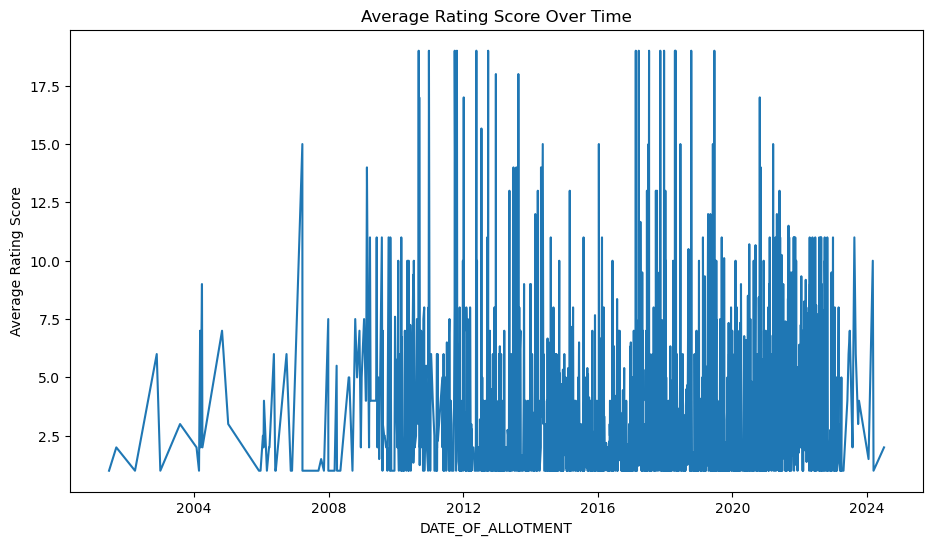

In [179]:
#Doing a time series analysis using issue date
time_series_data = df_entire_list_DI.groupby('DATE_OF_ALLOTMENT')['Rating Score'].mean()


plt.figure(figsize=(11, 6))
plt.plot(time_series_data)
plt.title('Average Rating Score Over Time')
plt.xlabel('DATE_OF_ALLOTMENT')
plt.ylabel('Average Rating Score')


plt.show()

In [60]:
df_entire_list_DI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14900 entries, 0 to 23964
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   COMPANY                             14900 non-null  object        
 1   ISIN                                14900 non-null  object        
 2   NAME_OF_THE_INSTRUMENT              14900 non-null  object        
 3   DESCRIPTION_IN_NSDL                 14900 non-null  object        
 4   ISSUE_PRICE                         14900 non-null  float64       
 5   FACE_VALUE                          14900 non-null  float64       
 6   DATE_OF_ALLOTMENT                   14900 non-null  datetime64[ns]
 7   REDEMPTION                          14900 non-null  datetime64[ns]
 8   COUPON_RATE                         14471 non-null  object        
 9   FREQUENCY_OF_THE_INTEREST_PAYMENT   14387 non-null  object        
 10  PUT_CALL_OPTION       

In [63]:
df_entire_list_DI['COUPON_RATE'].unique()

array(['8.90%', '7.75%', '10%', '5.25%', '5%', '8.85%', '9.05%', '9.22%',
       '10.40%', '7.97%', '7.36%', '8.75%', '9.70%', '7.19%', '8.84%',
       '10.90%', '7.74%', '8.13%', '7.52%', '0%', '7.65%', '7.14%', '9%',
       'N.A', '7.50%', '9.51%', '12.75%', '10.10%', '9.47%', '7.95%',
       '7.59%', '8.15%', '8.55%', '7.89%', '7.35%', '8.70% p.a.(Fixed)',
       '13.66%', '6%', '9.60%', '6.86%', '7.28%', nan, '10.41%', '11.60%',
       '9.25%', '8.30%', '15.75%', '5.75%', '8.50%', '10.20%', '11%',
       '7.29%', '8.57%', '8.97%', '8.95%', '8.16%', '8.63%', '9.10%',
       '9.35%', '7%', '7.87%', '8.72%', '7.21%', '8.69%', '11.40%',
       '9.50%', '10.50%', '8.40%', '6.09%', '8.60%', '9.75%', '8.05%',
       '8.64%', '8.70%', '10.65%', 'GSEC LINKED', '8.80%', '8.10%',
       '6.59%', '9.65%', '8.92%', '8.73%', '8.48%',
       'RESET RATE (REFERE REMARK)', 'KARVY CAPITAL ALPHA 500 INDEX',
       '9.20%', 'NIFTY 50 INDEX LINKED', '9.55%', '8.24%', '9.81%',
       '8.35%', '9.38%', '